In [ ]:
import pandas as pd
import os
import numpy as np

In [ ]:
# start from fresh and unmount any drive that was mounted before
# sometimes take a bit of time
from google.colab import drive
drive.flush_and_unmount()
drive.mount("/content/drive")
path_csv  = "/content/drive/MyDrive/datasets/"

Mounted at /content/drive


In [ ]:
#load attributes csv file
data= pd.read_csv(os.path.join(path_csv, "icustays_cancer without HF_labevents.csv"))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13586 entries, 0 to 13585
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       13586 non-null  int64  
 1   hadm_id          13586 non-null  int64  
 2   stay_id          13586 non-null  int64  
 3   first_careunit   13586 non-null  object 
 4   last_careunit    13586 non-null  object 
 5   intime           13586 non-null  object 
 6   outtime          13586 non-null  object 
 7   los              13586 non-null  float64
 8   labevent_id      13586 non-null  int64  
 9   subject_id-2     13586 non-null  int64  
 10  hadm_id-2        13586 non-null  int64  
 11  specimen_id      13586 non-null  int64  
 12  itemid           13586 non-null  int64  
 13  charttime        13586 non-null  object 
 14  storetime        13586 non-null  object 
 15  value            8279 non-null   float64
 16  valuenum         8279 non-null   float64
 17  valueuom    

### Filter charttime between ICU stay

In [ ]:
data2=data[(data['charttime']<data['outtime']) & (data['charttime']>data['intime'])]

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6245 entries, 0 to 13583
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       6245 non-null   int64  
 1   hadm_id          6245 non-null   int64  
 2   stay_id          6245 non-null   int64  
 3   first_careunit   6245 non-null   object 
 4   last_careunit    6245 non-null   object 
 5   intime           6245 non-null   object 
 6   outtime          6245 non-null   object 
 7   los              6245 non-null   float64
 8   labevent_id      6245 non-null   int64  
 9   subject_id-2     6245 non-null   int64  
 10  hadm_id-2        6245 non-null   int64  
 11  specimen_id      6245 non-null   int64  
 12  itemid           6245 non-null   int64  
 13  charttime        6245 non-null   object 
 14  storetime        6245 non-null   object 
 15  value            4096 non-null   float64
 16  valuenum         4096 non-null   float64
 17  valueuom     

### Filter NULL lab result

In [ ]:
data3 = data[data['value'].notna()]

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8279 entries, 6 to 12991
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       8279 non-null   int64  
 1   hadm_id          8279 non-null   int64  
 2   stay_id          8279 non-null   int64  
 3   first_careunit   8279 non-null   object 
 4   last_careunit    8279 non-null   object 
 5   intime           8279 non-null   object 
 6   outtime          8279 non-null   object 
 7   los              8279 non-null   float64
 8   labevent_id      8279 non-null   int64  
 9   subject_id-2     8279 non-null   int64  
 10  hadm_id-2        8279 non-null   int64  
 11  specimen_id      8279 non-null   int64  
 12  itemid           8279 non-null   int64  
 13  charttime        8279 non-null   object 
 14  storetime        8279 non-null   object 
 15  value            8279 non-null   float64
 16  valuenum         8279 non-null   float64
 17  valueuom     

### Check test value count
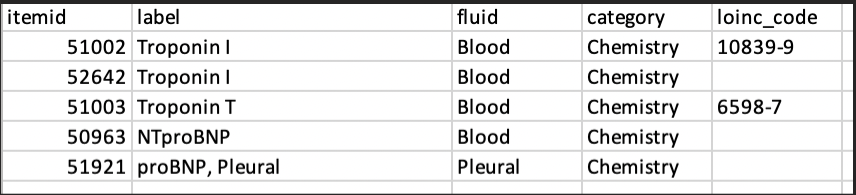

In [ ]:
data3['itemid'].value_counts()

51003    6800
50963    1372
51921     107
Name: itemid, dtype: int64

In [ ]:
data4=data3[data3['itemid']==51003]

In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6800 entries, 15 to 12991
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       6800 non-null   int64  
 1   hadm_id          6800 non-null   int64  
 2   stay_id          6800 non-null   int64  
 3   first_careunit   6800 non-null   object 
 4   last_careunit    6800 non-null   object 
 5   intime           6800 non-null   object 
 6   outtime          6800 non-null   object 
 7   los              6800 non-null   float64
 8   labevent_id      6800 non-null   int64  
 9   subject_id-2     6800 non-null   int64  
 10  hadm_id-2        6800 non-null   int64  
 11  specimen_id      6800 non-null   int64  
 12  itemid           6800 non-null   int64  
 13  charttime        6800 non-null   object 
 14  storetime        6800 non-null   object 
 15  value            6800 non-null   float64
 16  valuenum         6800 non-null   float64
 17  valueuom    

In [ ]:
data4.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,labevent_id,subject_id-2,...,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
15,18621427,25901873,33491955,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2147-10-22 17:52:20,2147-10-26 07:48:14,3.580486,107048535,18621427,...,2147-10-22 23:14:00,2147-10-23 00:36:00,0.06,0.06,ng/mL,0.0,0.01,abnormal,STAT,cTropnT > 0.10 ng/mL suggests Acute MI.
16,18621427,25901873,32336556,Trauma SICU (TSICU),Medical Intensive Care Unit (MICU),2147-10-15 17:59:58,2147-10-17 12:39:47,1.777650,107048535,18621427,...,2147-10-22 23:14:00,2147-10-23 00:36:00,0.06,0.06,ng/mL,0.0,0.01,abnormal,STAT,cTropnT > 0.10 ng/mL suggests Acute MI.
17,17762007,21881358,38889793,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2160-05-29 19:47:56,2160-06-09 21:10:01,11.057002,96318467,17762007,...,2160-05-30 00:58:00,2160-05-30 01:47:00,0.51,0.51,ng/mL,0.0,0.01,abnormal,ROUTINE,cTropnT > 0.10 ng/mL suggests Acute MI.
18,17762007,21881358,38889793,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2160-05-29 19:47:56,2160-06-09 21:10:01,11.057002,96318524,17762007,...,2160-05-30 04:34:00,2160-05-30 05:29:00,0.63,0.63,ng/mL,0.0,0.01,abnormal,ROUTINE,cTropnT > 0.10 ng/mL suggests Acute MI.
19,17762007,21881358,38889793,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2160-05-29 19:47:56,2160-06-09 21:10:01,11.057002,96317493,17762007,...,2160-05-15 12:57:00,2160-05-15 13:44:00,0.08,0.08,ng/mL,0.0,0.01,abnormal,STAT,cTropnT > 0.10 ng/mL suggests Acute MI.


In [ ]:
data4.sort_values(by=['subject_id','hadm_id','stay_id'], inplace=True, ascending=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data4.head(10)

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,labevent_id,subject_id-2,...,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
12026,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576,23926,10002155,...,2131-03-10 02:04:00,2131-03-10 03:17:00,0.05,0.05,ng/mL,0.0,0.01,abnormal,STAT,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
1921,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,9.076829,261124,10020944,...,2131-02-27 18:00:00,2131-02-27 20:36:00,0.02,0.02,ng/mL,0.0,0.01,abnormal,ROUTINE,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
1922,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,9.076829,261242,10020944,...,2131-02-28 04:16:00,2131-02-28 05:40:00,0.05,0.05,ng/mL,0.0,0.01,abnormal,ROUTINE,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
10704,10026255,22059910,31248398,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2201-07-07 19:40:00,2201-07-08 15:43:15,0.835590,323446,10026255,...,2201-07-10 08:30:00,2201-07-10 12:21:00,0.01,0.01,ng/mL,0.0,0.01,NaN,STAT,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
10703,10026255,22059910,38229329,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2201-07-10 10:10:47,2201-07-11 13:48:02,1.150868,323446,10026255,...,2201-07-10 08:30:00,2201-07-10 12:21:00,0.01,0.01,ng/mL,0.0,0.01,NaN,STAT,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
12754,10029057,28919637,36004746,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2187-07-30 21:48:00,2187-08-03 03:17:41,3.228947,348803,10029057,...,2187-07-31 13:55:00,2187-07-31 15:22:00,0.06,0.06,ng/mL,0.0,0.01,abnormal,STAT,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
12755,10029057,28919637,36004746,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2187-07-30 21:48:00,2187-08-03 03:17:41,3.228947,348790,10029057,...,2187-07-31 05:18:00,2187-07-31 06:22:00,0.06,0.06,ng/mL,0.0,0.01,abnormal,ROUTINE,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
208,10034317,20827960,33536886,Trauma SICU (TSICU),Trauma SICU (TSICU),2159-08-30 12:35:14,2159-08-31 16:26:27,1.160567,409903,10034317,...,2159-08-26 19:10:00,2159-08-26 19:58:00,0.01,0.01,ng/mL,0.0,0.01,NaN,STAT,cTropnT > 0.10 ng/mL suggests Acute MI.
210,10034317,20827960,33536886,Trauma SICU (TSICU),Trauma SICU (TSICU),2159-08-30 12:35:14,2159-08-31 16:26:27,1.160567,409943,10034317,...,2159-08-26 23:58:00,2159-08-27 06:33:00,0.01,0.01,ng/mL,0.0,0.01,NaN,ROUTINE,cTropnT > 0.10 ng/mL suggests Acute MI.
207,10034317,20827960,36228864,Trauma SICU (TSICU),Trauma SICU (TSICU),2159-08-26 12:59:45,2159-08-29 19:54:03,3.287708,409903,10034317,...,2159-08-26 19:10:00,2159-08-26 19:58:00,0.01,0.01,ng/mL,0.0,0.01,NaN,STAT,cTropnT > 0.10 ng/mL suggests Acute MI.


In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6800 entries, 12026 to 4590
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject_id       6800 non-null   int64  
 1   hadm_id          6800 non-null   int64  
 2   stay_id          6800 non-null   int64  
 3   first_careunit   6800 non-null   object 
 4   last_careunit    6800 non-null   object 
 5   intime           6800 non-null   object 
 6   outtime          6800 non-null   object 
 7   los              6800 non-null   float64
 8   labevent_id      6800 non-null   int64  
 9   subject_id-2     6800 non-null   int64  
 10  hadm_id-2        6800 non-null   int64  
 11  specimen_id      6800 non-null   int64  
 12  itemid           6800 non-null   int64  
 13  charttime        6800 non-null   object 
 14  storetime        6800 non-null   object 
 15  value            6800 non-null   float64
 16  valuenum         6800 non-null   float64
 17  valueuom  

In [ ]:
data5 = data4.reset_index(drop=True)

In [ ]:
data5.head(10)

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,labevent_id,subject_id-2,...,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576,23926,10002155,...,2131-03-10 02:04:00,2131-03-10 03:17:00,0.05,0.05,ng/mL,0.0,0.01,abnormal,STAT,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
1,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,9.076829,261124,10020944,...,2131-02-27 18:00:00,2131-02-27 20:36:00,0.02,0.02,ng/mL,0.0,0.01,abnormal,ROUTINE,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
2,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,9.076829,261242,10020944,...,2131-02-28 04:16:00,2131-02-28 05:40:00,0.05,0.05,ng/mL,0.0,0.01,abnormal,ROUTINE,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
3,10026255,22059910,31248398,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2201-07-07 19:40:00,2201-07-08 15:43:15,0.835590,323446,10026255,...,2201-07-10 08:30:00,2201-07-10 12:21:00,0.01,0.01,ng/mL,0.0,0.01,NaN,STAT,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
4,10026255,22059910,38229329,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2201-07-10 10:10:47,2201-07-11 13:48:02,1.150868,323446,10026255,...,2201-07-10 08:30:00,2201-07-10 12:21:00,0.01,0.01,ng/mL,0.0,0.01,NaN,STAT,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
5,10029057,28919637,36004746,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2187-07-30 21:48:00,2187-08-03 03:17:41,3.228947,348803,10029057,...,2187-07-31 13:55:00,2187-07-31 15:22:00,0.06,0.06,ng/mL,0.0,0.01,abnormal,STAT,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
6,10029057,28919637,36004746,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2187-07-30 21:48:00,2187-08-03 03:17:41,3.228947,348790,10029057,...,2187-07-31 05:18:00,2187-07-31 06:22:00,0.06,0.06,ng/mL,0.0,0.01,abnormal,ROUTINE,CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.
7,10034317,20827960,33536886,Trauma SICU (TSICU),Trauma SICU (TSICU),2159-08-30 12:35:14,2159-08-31 16:26:27,1.160567,409903,10034317,...,2159-08-26 19:10:00,2159-08-26 19:58:00,0.01,0.01,ng/mL,0.0,0.01,NaN,STAT,cTropnT > 0.10 ng/mL suggests Acute MI.
8,10034317,20827960,33536886,Trauma SICU (TSICU),Trauma SICU (TSICU),2159-08-30 12:35:14,2159-08-31 16:26:27,1.160567,409943,10034317,...,2159-08-26 23:58:00,2159-08-27 06:33:00,0.01,0.01,ng/mL,0.0,0.01,NaN,ROUTINE,cTropnT > 0.10 ng/mL suggests Acute MI.
9,10034317,20827960,36228864,Trauma SICU (TSICU),Trauma SICU (TSICU),2159-08-26 12:59:45,2159-08-29 19:54:03,3.287708,409903,10034317,...,2159-08-26 19:10:00,2159-08-26 19:58:00,0.01,0.01,ng/mL,0.0,0.01,NaN,STAT,cTropnT > 0.10 ng/mL suggests Acute MI.


In [ ]:
df=data5.copy()


# Mapping number of stay & ICU stay detail by using for loop & stay_id

In [ ]:
for i in range(len(df)):
    if i==0:
        num=1
        subjectid=df.loc[df.index[i:i+1],'subject_id'].values[0]
        hadmid=df.loc[df.index[i:i+1],'hadm_id'].values[0]
        stayid=df.loc[df.index[i:i+1],'stay_id'].values[0]
        df.loc[df.index[i:i+1],f'first_careunit_{num}']= df.loc[df.index[i:i+1],'first_careunit'].values[0]
        df.loc[df.index[i:i+1],f'last_careunit_{num}']= df.loc[df.index[i:i+1],'last_careunit'].values[0]
        df.loc[df.index[i:i+1],f'intime_{num}']= df.loc[df.index[i:i+1],'intime'].values[0]
        df.loc[df.index[i:i+1],f'outtime_{num}']= df.loc[df.index[i:i+1],'outtime'].values[0]
        df.loc[df.index[i:i+1],f'los_{num}']= df.loc[df.index[i:i+1],'los'].values[0]
        df.loc[df.index[i:i+1],'stay']=num
    else:
        if ((subjectid==(df.loc[df.index[i:i+1],'subject_id']).values[0]) & (hadmid==(df.loc[df.index[i:i+1],'hadm_id']).values[0]) & (stayid!=(df.loc[df.index[i:i+1],'stay_id']).values[0])):
            num=num+1
            df.loc[df.index[i:i+1],f'first_careunit_{num}']= df.loc[df.index[i:i+1],'first_careunit'].values[0]
            df.loc[df.index[i:i+1],f'last_careunit_{num}']= df.loc[df.index[i:i+1],'last_careunit'].values[0]
            df.loc[df.index[i:i+1],f'intime_{num}']= df.loc[df.index[i:i+1],'intime'].values[0]      
            df.loc[df.index[i:i+1],f'outtime_{num}']= df.loc[df.index[i:i+1],'outtime'].values[0]
            df.loc[df.index[i:i+1],f'los_{num}']= df.loc[df.index[i:i+1],'los'].values[0]
            stayid=df.loc[df.index[i:i+1],'stay_id'].values[0]
            df.loc[df.index[i:i+1],'stay']=num
            print(num)
        elif ((subjectid==(df.loc[df.index[i:i+1],'subject_id']).values[0]) & (hadmid==(df.loc[df.index[i:i+1],'hadm_id']).values[0]) & (stayid==(df.loc[df.index[i:i+1],'stay_id']).values[0])):
            df.loc[df.index[i:i+1],f'first_careunit_{num}']= ''
            df.loc[df.index[i:i+1],f'last_careunit_{num}']= ''
            df.loc[df.index[i:i+1],f'intime_{num}']= ''
            df.loc[df.index[i:i+1],f'outtime_{num}']= ''
            df.loc[df.index[i:i+1],f'los_{num}']= ''
        else:
            num=1
            subjectid=df.loc[df.index[i:i+1],'subject_id'].values[0]
            hadmid=df.loc[df.index[i:i+1],'hadm_id'].values[0]
            stayid=df.loc[df.index[i:i+1],'stay_id'].values[0]
            df.loc[df.index[i:i+1],f'first_careunit_{num}']= df.loc[df.index[i:i+1],'first_careunit'].values[0]
            df.loc[df.index[i:i+1],f'last_careunit_{num}']= df.loc[df.index[i:i+1],'last_careunit'].values[0]
            df.loc[df.index[i:i+1],f'intime_{num}']= df.loc[df.index[i:i+1],'intime'].values[0]
            df.loc[df.index[i:i+1],f'outtime_{num}']= df.loc[df.index[i:i+1],'outtime'].values[0]
            df.loc[df.index[i:i+1],f'los_{num}']= df.loc[df.index[i:i+1],'los'].values[0]
            df.loc[df.index[i:i+1],'stay']=num

2
2
2
2
2
2
2
2
2
2
3
2
2
3
4
2
2
2
2
2
2
3
2
3
2
2
2
3
2
2
3
2
3
4
2
3
2
2
2
2
2
3
2
3
2
2
2
3
2
3
2
3
2
2
3
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
3
2
3
4
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
4
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
2
3
2
2
3
2
2
3
2
2
2
3
4
5
6
7
8
9
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
4
5
2
2
2
2
2
2
3
4
5
2
3
4
5
2
2
2
2
2
2
2
3
2
2
2
3
4
5
2
2
3
2
2
2
2
2
2
3
2
2
3
2
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
3
4
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
4
5
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
3
2
3
2
3
2
2
2


In [ ]:
df.to_csv('stay.csv',index=False)

In [ ]:
df.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,labevent_id,subject_id-2,...,first_careunit_8,last_careunit_8,intime_8,outtime_8,los_8,first_careunit_9,last_careunit_9,intime_9,outtime_9,los_9
0,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576,23926,10002155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,9.076829,261124,10020944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,9.076829,261242,10020944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10026255,22059910,31248398,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2201-07-07 19:40:00,2201-07-08 15:43:15,0.835590,323446,10026255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10026255,22059910,38229329,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2201-07-10 10:10:47,2201-07-11 13:48:02,1.150868,323446,10026255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2=df.copy()

In [ ]:
df2.sort_values(by=['subject_id','hadm_id','stay_id','labevent_id'], inplace=True, ascending=True)

In [ ]:
df3 = df2.reset_index(drop=True)

In [ ]:
df3.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,labevent_id,subject_id-2,...,first_careunit_8,last_careunit_8,intime_8,outtime_8,los_8,first_careunit_9,last_careunit_9,intime_9,outtime_9,los_9
0,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576,23926,10002155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,9.076829,261124,10020944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,9.076829,261242,10020944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10026255,22059910,31248398,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2201-07-07 19:40:00,2201-07-08 15:43:15,0.835590,323446,10026255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10026255,22059910,38229329,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2201-07-10 10:10:47,2201-07-11 13:48:02,1.150868,323446,10026255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3=df3.drop(['first_careunit','last_careunit','intime','outtime','los','subject_id-2','hadm_id-2','itemid'],axis=1)

In [ ]:
df=df3.copy()

In [ ]:
#df=df[(df['stay']<2) | (df['stay'].isnull())]

In [ ]:
#df.loc[df.stay.isnull(), 'stay_id'] = ""

## Mapping number of lab measurement & lab measurement by using for loop & hadm_id

In [ ]:
for i in range(len(df)):
    if i==0:
        num=1
        subjectid=df.loc[df.index[i:i+1],'subject_id'].values[0]
        hadmid=df.loc[df.index[i:i+1],'hadm_id'].values[0]
        stayid=df.loc[df.index[i:i+1],'stay_id'].values[0]
        labeventid=df.loc[df.index[i:i+1],'labevent_id'].values[0]
        specimenid=df.loc[df.index[i:i+1],'specimen_id'].values[0]
        charttime=df.loc[df.index[i:i+1],'charttime'].values[0]
        storetime=df.loc[df.index[i:i+1],'storetime'].values[0]
        value=df.loc[df.index[i:i+1],'value'].values[0]
        #valuenum=df.loc[df.index[i:i+1],'valuenum'].values[0]
        #ref_range_lower=df.loc[df.index[i:i+1],'ref_range_upper'].values[0]
        flag=df.loc[df.index[i:i+1],'flag'].values[0]
        priority=df.loc[df.index[i:i+1],'priority'].values[0]
        df.loc[df.index[i:i+1],f'labevent_id_{num}']= df.loc[df.index[i:i+1],'labevent_id'].values[0]
        df.loc[df.index[i:i+1],f'specimen_id_{num}']= df.loc[df.index[i:i+1],'specimen_id'].values[0]
        df.loc[df.index[i:i+1],f'charttime_{num}']= df.loc[df.index[i:i+1],'charttime'].values[0]
        df.loc[df.index[i:i+1],f'storetime_{num}']= df.loc[df.index[i:i+1],'storetime'].values[0]
        df.loc[df.index[i:i+1],f'value_{num}']= df.loc[df.index[i:i+1],'value'].values[0]
        #df.loc[df.index[i:i+1],f'valuenum_{num}']= df.loc[df.index[i:i+1],'valuenum'].values[0]
        #df.loc[df.index[i:i+1],f'ref_range_upper_{num}']= df.loc[df.index[i:i+1],'ref_range_upper'].values[0]        
        df.loc[df.index[i:i+1],f'flag_{num}']= df.loc[df.index[i:i+1],'flag'].values[0] 
        df.loc[df.index[i:i+1],f'priority_{num}']= df.loc[df.index[i:i+1],'priority'].values[0]
        df.loc[df.index[i:i+1],'reading']=num
    else:
        if ((subjectid==(df.loc[df.index[i:i+1],'subject_id']).values[0]) & (hadmid==(df.loc[df.index[i:i+1],'hadm_id']).values[0]) 
        & (stayid==(df.loc[df.index[i:i+1],'stay_id']).values[0])):
            num=num+1  
            df.loc[df.index[i:i+1],f'labevent_id_{num}']= df.loc[df.index[i:i+1],'labevent_id'].values[0]
            df.loc[df.index[i:i+1],f'specimen_id_{num}']= df.loc[df.index[i:i+1],'specimen_id'].values[0]
            df.loc[df.index[i:i+1],f'charttime_{num}']= df.loc[df.index[i:i+1],'charttime'].values[0]
            df.loc[df.index[i:i+1],f'storetime_{num}']= df.loc[df.index[i:i+1],'storetime'].values[0]
            df.loc[df.index[i:i+1],f'value_{num}']= df.loc[df.index[i:i+1],'value'].values[0]
            #df.loc[df.index[i:i+1],f'valuenum_{num}']= df.loc[df.index[i:i+1],'valuenum'].values[0]
            #df.loc[df.index[i:i+1],f'ref_range_upper_{num}']= df.loc[df.index[i:i+1],'ref_range_upper'].values[0]        
            df.loc[df.index[i:i+1],f'flag_{num}']= df.loc[df.index[i:i+1],'flag'].values[0] 
            df.loc[df.index[i:i+1],f'priority_{num}']= df.loc[df.index[i:i+1],'priority'].values[0]
            stayid=df.loc[df.index[i:i+1],'stay_id'].values[0]
            df.loc[df.index[i:i+1],'reading']=num
        else:
            num=1
            subjectid=df.loc[df.index[i:i+1],'subject_id'].values[0]
            hadmid=df.loc[df.index[i:i+1],'hadm_id'].values[0]
            stayid=df.loc[df.index[i:i+1],'stay_id'].values[0]
            labeventid=df.loc[df.index[i:i+1],'labevent_id'].values[0]
            specimenid=df.loc[df.index[i:i+1],'specimen_id'].values[0]
            charttime=df.loc[df.index[i:i+1],'charttime'].values[0]
            storetime=df.loc[df.index[i:i+1],'storetime'].values[0]
            value=df.loc[df.index[i:i+1],'value'].values[0]
            #valuenum=df.loc[df.index[i:i+1],'valuenum'].values[0]
            #ref_range_lower=df.loc[df.index[i:i+1],'ref_range_upper'].values[0]
            flag=df.loc[df.index[i:i+1],'flag'].values[0]
            priority=df.loc[df.index[i:i+1],'priority'].values[0]
            df.loc[df.index[i:i+1],f'labevent_id_{num}']= df.loc[df.index[i:i+1],'labevent_id'].values[0]
            df.loc[df.index[i:i+1],f'specimen_id_{num}']= df.loc[df.index[i:i+1],'specimen_id'].values[0]
            df.loc[df.index[i:i+1],f'charttime_{num}']= df.loc[df.index[i:i+1],'charttime'].values[0]
            df.loc[df.index[i:i+1],f'storetime_{num}']= df.loc[df.index[i:i+1],'storetime'].values[0]
            df.loc[df.index[i:i+1],f'value_{num}']= df.loc[df.index[i:i+1],'value'].values[0]
            #df.loc[df.index[i:i+1],f'valuenum_{num}']= df.loc[df.index[i:i+1],'valuenum'].values[0]
            #df.loc[df.index[i:i+1],f'ref_range_upper_{num}']= df.loc[df.index[i:i+1],'ref_range_upper'].values[0]        
            df.loc[df.index[i:i+1],f'flag_{num}']= df.loc[df.index[i:i+1],'flag'].values[0] 
            df.loc[df.index[i:i+1],f'priority_{num}']= df.loc[df.index[i:i+1],'priority'].values[0]
            df.loc[df.index[i:i+1],'reading']=num

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [ ]:
df3=df.copy()

In [ ]:
df3.head()

,subject_id,hadm_id,stay_id,labevent_id,specimen_id,charttime,storetime,value,valuenum,valueuom,...,value_27,flag_27,priority_27,labevent_id_28,specimen_id_28,charttime_28,storetime_28,value_28,flag_28,priority_28
0,10002155,20345487,32358465,23926,83875868,2131-03-10 02:04:00,2131-03-10 03:17:00,0.05,0.05,ng/mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10020944,29974575,30757476,261124,77425420,2131-02-27 18:00:00,2131-02-27 20:36:00,0.02,0.02,ng/mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10020944,29974575,30757476,261242,46047675,2131-02-28 04:16:00,2131-02-28 05:40:00,0.05,0.05,ng/mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10026255,22059910,31248398,323446,20702108,2201-07-10 08:30:00,2201-07-10 12:21:00,0.01,0.01,ng/mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10026255,22059910,38229329,323446,20702108,2201-07-10 08:30:00,2201-07-10 12:21:00,0.01,0.01,ng/mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3.to_csv('lab_reading.csv',index=False)

In [ ]:
df3=df3.drop(['labevent_id','specimen_id','charttime','storetime','value','valuenum','ref_range_upper','flag','priority','comments','ref_range_lower','valueuom','stay','reading'],axis=1)

In [ ]:
df3.head()

,subject_id,hadm_id,stay_id,first_careunit_1,last_careunit_1,intime_1,outtime_1,los_1,first_careunit_2,last_careunit_2,...,value_27,flag_27,priority_27,labevent_id_28,specimen_id_28,charttime_28,storetime_28,value_28,flag_28,priority_28
0,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,0.858576,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,9.076829,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10020944,29974575,30757476,,,,,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10026255,22059910,31248398,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2201-07-07 19:40:00,2201-07-08 15:43:15,0.83559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10026255,22059910,38229329,NaN,NaN,NaN,NaN,NaN,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df3['stay_id']=df3['stay_id'].astype(str)

In [ ]:
df3=df3.fillna('')

In [ ]:
df3=df3.groupby(['subject_id','hadm_id','stay_id'], as_index = False).agg({''.join}).reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


In [ ]:
df3 = df3.droplevel(level=1,axis=1)

In [ ]:
df3.head()

,subject_id,hadm_id,stay_id,first_careunit_1,last_careunit_1,intime_1,outtime_1,first_careunit_2,last_careunit_2,intime_2,...,flag_26,priority_26,charttime_27,storetime_27,flag_27,priority_27,charttime_28,storetime_28,flag_28,priority_28
0,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,,,,...,,,,,,,,,,
1,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,,,,...,,,,,,,,,,
2,10026255,22059910,31248398,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2201-07-07 19:40:00,2201-07-08 15:43:15,,,,...,,,,,,,,,,
3,10026255,22059910,38229329,,,,,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2201-07-10 10:10:47,...,,,,,,,,,,
4,10029057,28919637,36004746,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2187-07-30 21:48:00,2187-08-03 03:17:41,,,,...,,,,,,,,,,


In [ ]:
df3.to_csv('stay_lab.csv',index=False)

# Mapping seq number by using for loop & stay_id


In [ ]:
diagnose=pd.read_csv(os.path.join(path_csv, "diagnose.csv"))

In [ ]:
diagnose.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,18821140,29526666,5,E8792,9
1,18821140,29526666,6,E8499,9
2,18821140,29526666,7,73300,9
3,18821140,29526666,4,2948,9
4,18821140,29526666,9,49390,9


In [ ]:
diagnose['icd_code']

0         E8792  
1         E8499  
2         73300  
3         2948   
4         49390  
           ...   
815271    28983  
815272    7847   
815273    462    
815274    27651  
815275    78609  
Name: icd_code, Length: 815276, dtype: object

In [ ]:
for i in range(diagnose['seq_num'].max()):
    diagnose[f'seq_{i+1}']=''

In [ ]:
diagnose.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,seq_1,seq_2,seq_3,seq_4,seq_5,...,seq_30,seq_31,seq_32,seq_33,seq_34,seq_35,seq_36,seq_37,seq_38,seq_39
0,18821140,29526666,5,E8792,9,,,,,,...,,,,,,,,,,
1,18821140,29526666,6,E8499,9,,,,,,...,,,,,,,,,,
2,18821140,29526666,7,73300,9,,,,,,...,,,,,,,,,,
3,18821140,29526666,4,2948,9,,,,,,...,,,,,,,,,,
4,18821140,29526666,9,49390,9,,,,,,...,,,,,,,,,,


In [ ]:
for i in range(len(diagnose)):
    n=diagnose.loc[diagnose.index[i:i+1],'seq_num'].values[0]
    diagnose.loc[diagnose.index[i:i+1],f'seq_{n}']=diagnose.loc[diagnose.index[i:i+1],'icd_code'].values[0]
    print(i)

In [ ]:
diagnose.head()

In [ ]:
diagnose.to_csv('diagnose_map.csv')

In [ ]:
diagnose2=diagnose.copy()

In [ ]:
diagnose3 =diagnose2.drop(labels=['seq_num','icd_code'],axis=1)

In [ ]:
diagnose3 = diagnose3.applymap(str)

In [ ]:
diagnose3=diagnose3.groupby(['subject_id','hadm_id','icd_version'], as_index = False).agg({''.join}).reset_index()

In [ ]:
diagnose3.head()

In [ ]:
diagnose3.to_csv('diagnose_map_3.csv',index=False)

# Data merging


In [ ]:
data=pd.read_csv('stay_lab.csv')

#### Lab Reading

In [ ]:
reading=pd.read_csv('lab_reading.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (36,37,38,39,41,42,43,44,46,47,48,49,51,52,53,54,56,57,58,59,148,149,151,152,155,156,158,159,162,163,165,166,169,170,172,173,176,177,179,180,183,184,186,187,190,191,193,194,197,198,200,201,204,205,207,208,211,212,214,215,218,219,221,222,225,226,228,229,232,233,235,236,239,240,242,243,246,247,249,250,253,254,256,257) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
reading=reading[[c for c in reading if c.startswith(('subject','hadm','value','ref_','los'))]]

In [ ]:
reading.drop(['value','valuenum','valueuom','ref_range_lower','ref_range_upper'],axis=1,inplace=True)

In [ ]:
reading.fillna('')

,subject_id,hadm_id,los_1,los_2,los_3,los_4,los_5,los_6,los_7,los_8,...,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,value_27,value_28
0,10002155,20345487,0.858576,,,,,,,,...,,,,,,,,,,
1,10020944,29974575,9.076829,,,,,,,,...,,,,,,,,,,
2,10020944,29974575,,,,,,,,,...,,,,,,,,,,
3,10026255,22059910,0.83559,,,,,,,,...,,,,,,,,,,
4,10026255,22059910,,1.150868,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,19996783,21880161,,2.384907,,,,,,,...,,,,,,,,,,
6796,19996783,21880161,,,,,,,,,...,,,,,,,,,,
6797,19999987,23865745,,,,,,,,,...,,,,,,,,,,
6798,19999987,23865745,,,,,,,,,...,,,,,,,,,,


In [ ]:
reading.head()

,subject_id,hadm_id,los_1,los_2,los_3,los_4,los_5,los_6,los_7,los_8,...,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,value_27,value_28
0,10002155,20345487,0.858576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10020944,29974575,9.076829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10020944,29974575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10026255,22059910,0.835590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10026255,22059910,NaN,1.150868,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
reading2 = reading.groupby(['subject_id','hadm_id'], as_index = False).agg({sum}).reset_index()
reading2

,subject_id,hadm_id,los_1,los_2,los_3,los_4,los_5,los_6,los_7,los_8,...,value_19,value_20,value_21,value_22,value_23,value_24,value_25,value_26,value_27,value_28
,,,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,10002155,20345487,0.858576,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10020944,29974575,9.076829,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10026255,22059910,0.835590,1.150868,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10029057,28919637,3.228947,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10034317,20827960,1.160567,3.287708,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,19985545,21516111,1.541539,5.879444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1719,19986604,21846283,1.047836,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1720,19987702,26568899,1.956030,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
reading2 = reading2.droplevel(level=1,axis=1)

In [ ]:
data = pd.merge(data,reading2,on=['subject_id','hadm_id'],how='left')

#### Seq number (by stay_id)

In [ ]:
diagnose3=pd.read_csv('diagnose_map_3.csv')


In [ ]:
diagnose3=pd.read_csv(os.path.join(path_csv, "diagnose_map_3.csv"))

In [ ]:
diagnose3=diagnose3.drop('Unnamed: 0',axis=1)

In [ ]:
diagnose3=diagnose3[1:]

In [ ]:
data = pd.merge(data,diagnose3,on=['subject_id','hadm_id'],how='left')

#### Patient demographics

In [ ]:
patient=pd.read_csv(os.path.join(path_csv, "patients.csv"))

In [ ]:
patient.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000048,F,23,2126,2008 - 2010,NaN
1,10002723,F,0,2128,2017 - 2019,NaN
2,10003939,M,0,2184,2008 - 2010,NaN
3,10004222,M,0,2161,2014 - 2016,NaN
4,10005325,F,0,2154,2011 - 2013,NaN


In [ ]:
data = pd.merge(data,patient,on='subject_id',how='left')

In [ ]:
data.head()

,subject_id,hadm_id,stay_id,first_careunit_1,last_careunit_1,intime_1,outtime_1,first_careunit_2,last_careunit_2,intime_2,...,seq_35,seq_36,seq_37,seq_38,seq_39,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,80,2128,2008 - 2010,2131-03-10
1,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,72,2131,2014 - 2016,NaN
2,10026255,22059910,31248398,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2201-07-07 19:40:00,2201-07-08 15:43:15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,66,2200,2011 - 2013,2201-07-13
3,10026255,22059910,38229329,NaN,NaN,NaN,NaN,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2201-07-10 10:10:47,...,NaN,NaN,NaN,NaN,NaN,M,66,2200,2011 - 2013,2201-07-13
4,10029057,28919637,36004746,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2187-07-30 21:48:00,2187-08-03 03:17:41,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,89,2187,2008 - 2010,NaN


In [ ]:
data.to_csv('raw_Troponin.csv',index=False)

# Data categorization

In [ ]:
data2=data.copy()

In [ ]:
for i in range(39):
    data[f'seq_{i+1}']=data[f'seq_{i+1}'].astype(str)

In [ ]:

icd9_hypertension=['401','4011','4019']
icd10_hypertension=['I10']
icd9_diabetes=['25000']
icd10_diabetes=['E08','E09','E10','E11','E12','E13']
icd9_COPD=['490','491','492','493','494','495','496']
icd10_COPD=['J449']
icd9_Atrial_fibrillation=['42731']
icd10_Atrial_fibrillation=['I48']
icd9_Acute_myocardial_infarction=['410']
icd10_Acute_myocardial_infarction=['I21','I22']
icd9_Ischemic_heart_disease=['4149']
icd10_Ischemic_heart_disease=['I20','I21','I22','I23','I24','I25','I248']
icd9_Cerebrovascular=['430','431','432','433','434','435','436','437','438']
icd10_Cerebrovascular=['I679']
icd9_Chronic_kidney_disease=['5859']
icd10_Chronic_kidney_disease=['N189']

for i in range(len(data)):
  if (data.loc[data.index[i:i+1],'icd_version'].values[0])==9:
    for j in range(39):
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd9_hypertension:
        data.loc[data.index[i:i+1],'hypertension']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd9_diabetes:
        data.loc[data.index[i:i+1],'diabetes']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd9_COPD:
        data.loc[data.index[i:i+1],'COPD']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd9_Atrial_fibrillation:
        data.loc[data.index[i:i+1],'Atrial_fibrillation']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd9_Acute_myocardial_infarction:
        data.loc[data.index[i:i+1],'Acute_myocardial_infarction']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd9_Ischemic_heart_disease:
        data.loc[data.index[i:i+1],'Ischemic_heart_disease']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd9_Cerebrovascular:
        data.loc[data.index[i:i+1],'Cerebrovascular']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd9_Chronic_kidney_disease:
        data.loc[data.index[i:i+1],'Chronic_kidney_disease']=1
  else:
    for j in range(39):
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd10_hypertension:
        data.loc[data.index[i:i+1],'hypertension']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd10_diabetes:
        data.loc[data.index[i:i+1],'diabetes']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd10_COPD:
        data.loc[data.index[i:i+1],'COPD']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd10_Atrial_fibrillation:
        data.loc[data.index[i:i+1],'Atrial_fibrillation']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd10_Acute_myocardial_infarction:
        data.loc[data.index[i:i+1],'Acute_myocardial_infarction']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd10_Ischemic_heart_disease:
        data.loc[data.index[i:i+1],'Ischemic_heart_disease']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd10_Cerebrovascular:
        data.loc[data.index[i:i+1],'Cerebrovascular']=1
      if data.loc[data.index[i:i+1],f'seq_{j+1}'].values[0].strip() in icd10_Chronic_kidney_disease:
        data.loc[data.index[i:i+1],'Chronic_kidney_disease']=1

In [ ]:
data[['hypertension','diabetes','COPD','Atrial_fibrillation','Ischemic_heart_disease','Cerebrovascular','Chronic_kidney_disease']]=data[['hypertension','diabetes','COPD','Atrial_fibrillation','Ischemic_heart_disease','Cerebrovascular','Chronic_kidney_disease']].fillna(0.)

#### Patient weight

In [ ]:
weight=pd.read_csv(os.path.join(path_csv, "Admission Weight (Kg).csv"))

In [ ]:
weight['stay_id'].value_counts().max()

1

In [ ]:
weight.head()

,subject_id,hadm_id,stay_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10010497,22058681,34566935,2140-08-21 03:10:00,2140-08-21 05:59:00,226512,79.1,79.1,kg,0
1,10010497,20438218,35214939,2140-09-15 21:02:00,2140-09-15 22:47:00,226512,77.4,77.4,kg,0
2,10019777,27738145,34578020,2187-02-10 18:58:00,2187-02-10 23:00:00,226512,58.0,58.0,kg,0
3,10020944,29974575,30757476,2131-02-27 15:35:00,2131-02-27 18:08:00,226512,107.0,107.0,kg,0
4,10023771,20044587,33177122,2113-08-25 09:32:00,2113-08-25 10:08:00,226512,78.0,78.0,kg,0


In [ ]:
weight=weight.drop(['subject_id', 'hadm_id', 'charttime', 'storetime', 'itemid', 'valuenum', 'valueuom', 'warning'],axis=1)

In [ ]:
weight.columns = weight.columns.str.replace('value', 'Admission Weight (Kg)')

In [ ]:
data = pd.merge(data,weight,on='stay_id',how='left')

In [ ]:
data.head()

,subject_id,hadm_id,stay_id,first_careunit_1,last_careunit_1,intime_1,outtime_1,first_careunit_2,last_careunit_2,intime_2,...,anchor_year_group,dod,Chronic_kidney_disease,COPD,Atrial_fibrillation,hypertension,Ischemic_heart_disease,diabetes,Cerebrovascular,Admission Weight (Kg)
0,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,NaN,NaN,NaN,...,2008 - 2010,2131-03-10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.1
1,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,NaN,NaN,NaN,...,2014 - 2016,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,107.0
2,10026255,22059910,31248398,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2201-07-07 19:40:00,2201-07-08 15:43:15,NaN,NaN,NaN,...,2011 - 2013,2201-07-13,0.0,1.0,1.0,1.0,0.0,0.0,0.0,68.6
3,10026255,22059910,38229329,NaN,NaN,NaN,NaN,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2201-07-10 10:10:47,...,2011 - 2013,2201-07-13,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN
4,10029057,28919637,36004746,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2187-07-30 21:48:00,2187-08-03 03:17:41,NaN,NaN,NaN,...,2008 - 2010,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,69.6


#### Creatinine

In [ ]:
creatinine=pd.read_csv(os.path.join(path_csv, "Creatinine.csv"))

In [ ]:
creatinine.head()


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,labevent_id,subject_id-2,...,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,10021312,28829452,37507305,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2113-09-14 10:19:17,2113-09-15 12:43:00,1.099803,263686,10021312,...,2113-09-15 03:47:00,2113-09-15 05:04:00,0.6,0.6,mg/dL,0.4,1.1,NaN,STAT,NaN
1,10021312,28829452,37507305,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2113-09-14 10:19:17,2113-09-15 12:43:00,1.099803,263720,10021312,...,2113-09-16 07:08:00,2113-09-16 09:46:00,0.6,0.6,mg/dL,0.4,1.1,NaN,STAT,NaN
2,10021312,28829452,37507305,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2113-09-14 10:19:17,2113-09-15 12:43:00,1.099803,263744,10021312,...,2113-09-17 07:00:00,2113-09-17 09:32:00,0.6,0.6,mg/dL,0.4,1.1,NaN,STAT,NaN
3,10021312,28829452,37507305,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2113-09-14 10:19:17,2113-09-15 12:43:00,1.099803,263766,10021312,...,2113-09-18 07:09:00,2113-09-18 11:01:00,0.6,0.6,mg/dL,0.4,1.1,NaN,STAT,NaN
4,10021312,28829452,37507305,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2113-09-14 10:19:17,2113-09-15 12:43:00,1.099803,263787,10021312,...,2113-09-19 08:00:00,2113-09-19 10:47:00,0.6,0.6,mg/dL,0.4,1.1,NaN,ROUTINE,NaN


In [ ]:
creatinine.sort_values(by=['subject_id','hadm_id','labevent_id'], inplace=True, ascending=True)

In [ ]:
creatinine=creatinine.applymap(str)

In [ ]:
df=creatinine.copy()

In [ ]:
len(df)

176114

In [ ]:
for i in range(len(df)):
    if i==0:
        num=1
        subjectid=df.loc[df.index[i:i+1],'subject_id'].values[0]
        hadmid=df.loc[df.index[i:i+1],'hadm_id'].values[0]
        #charttime=df.loc[df.index[i:i+1],'charttime'].values[0]
        #storetime=df.loc[df.index[i:i+1],'storetime'].values[0]
        #value=df.loc[df.index[i:i+1],'value'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_charttime_{num}']= df.loc[df.index[i:i+1],'charttime'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_storetime_{num}']= df.loc[df.index[i:i+1],'storetime'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_value_{num}']= df.loc[df.index[i:i+1],'value'].values[0]
    else:
        if ((subjectid==(df.loc[df.index[i:i+1],'subject_id']).values[0]) & (hadmid==(df.loc[df.index[i:i+1],'hadm_id']).values[0])):
            num=num+1  
            #df.loc[df.index[i:i+1],f'creatinine_charttime_{num}']= df.loc[df.index[i:i+1],'charttime'].values[0]
            #df.loc[df.index[i:i+1],f'creatinine_storetime_{num}']= df.loc[df.index[i:i+1],'storetime'].values[0]
            #df.loc[df.index[i:i+1],f'creatinine_value_{num}']= df.loc[df.index[i:i+1],'value'].values[0]
 
        else:
            num=1
            subjectid=df.loc[df.index[i:i+1],'subject_id'].values[0]
            hadmid=df.loc[df.index[i:i+1],'hadm_id'].values[0]
            #charttime=df.loc[df.index[i:i+1],'charttime'].values[0]
            #storetime=df.loc[df.index[i:i+1],'storetime'].values[0]
            #value=df.loc[df.index[i:i+1],'value'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_charttime_{num}']= df.loc[df.index[i:i+1],'charttime'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_storetime_{num}']= df.loc[df.index[i:i+1],'storetime'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_value_{num}']= df.loc[df.index[i:i+1],'value'].values[0]
    print(i)

In [ ]:
for i in range(len(df)):
    if i==0:
        num=1
        subjectid=df.loc[df.index[i:i+1],'subject_id'].values[0]
        hadmid=df.loc[df.index[i:i+1],'hadm_id'].values[0]
        labeventid=df.loc[df.index[i:i+1],'labevent_id'].values[0]
        specimenid=df.loc[df.index[i:i+1],'specimen_id'].values[0]
        charttime=df.loc[df.index[i:i+1],'charttime'].values[0]
        storetime=df.loc[df.index[i:i+1],'storetime'].values[0]
        value=df.loc[df.index[i:i+1],'value'].values[0]
        valuenum=df.loc[df.index[i:i+1],'valuenum'].values[0]
        ref_range_upper=df.loc[df.index[i:i+1],'ref_range_upper'].values[0]
        ref_range_lower=df.loc[df.index[i:i+1],'ref_range_lower'].values[0]
        flag=df.loc[df.index[i:i+1],'flag'].values[0]
        priority=df.loc[df.index[i:i+1],'priority'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_labevent_id_{num}']= df.loc[df.index[i:i+1],'labevent_id'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_specimen_id_{num}']= df.loc[df.index[i:i+1],'specimen_id'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_charttime_{num}']= df.loc[df.index[i:i+1],'charttime'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_storetime_{num}']= df.loc[df.index[i:i+1],'storetime'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_value_{num}']= df.loc[df.index[i:i+1],'value'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_valuenum_{num}']= df.loc[df.index[i:i+1],'valuenum'].values[0]
        df.loc[df.index[i:i+1],f'creatinine_ref_range_lower_{num}']= df.loc[df.index[i:i+1],'ref_range_lower'].values[0]   
        df.loc[df.index[i:i+1],f'creatinine_ref_range_upper_{num}']= df.loc[df.index[i:i+1],'ref_range_upper'].values[0]        
        df.loc[df.index[i:i+1],f'creatinine_flag_{num}']= df.loc[df.index[i:i+1],'flag'].values[0] 
        df.loc[df.index[i:i+1],f'creatinine_priority_{num}']= df.loc[df.index[i:i+1],'priority'].values[0]
        df.loc[df.index[i:i+1],'creatinine_reading']=num
    else:
        if ((subjectid==(df.loc[df.index[i:i+1],'subject_id']).values[0]) & (hadmid==(df.loc[df.index[i:i+1],'hadm_id']).values[0])):
            num=num+1  
            df.loc[df.index[i:i+1],f'creatinine_labevent_id_{num}']= df.loc[df.index[i:i+1],'labevent_id'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_specimen_id_{num}']= df.loc[df.index[i:i+1],'specimen_id'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_charttime_{num}']= df.loc[df.index[i:i+1],'charttime'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_storetime_{num}']= df.loc[df.index[i:i+1],'storetime'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_value_{num}']= df.loc[df.index[i:i+1],'value'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_valuenum_{num}']= df.loc[df.index[i:i+1],'valuenum'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_ref_range_upper_{num}']= df.loc[df.index[i:i+1],'ref_range_upper'].values[0]  
            df.loc[df.index[i:i+1],f'creatinine_ref_range_lower_{num}']= df.loc[df.index[i:i+1],'ref_range_lower'].values[0]         
            df.loc[df.index[i:i+1],f'creatinine_flag_{num}']= df.loc[df.index[i:i+1],'flag'].values[0] 
            df.loc[df.index[i:i+1],f'creatinine_priority_{num}']= df.loc[df.index[i:i+1],'priority'].values[0]
            df.loc[df.index[i:i+1],'creatinine_reading']=num
        else:
            num=1
            subjectid=df.loc[df.index[i:i+1],'subject_id'].values[0]
            hadmid=df.loc[df.index[i:i+1],'hadm_id'].values[0]
            labeventid=df.loc[df.index[i:i+1],'labevent_id'].values[0]
            specimenid=df.loc[df.index[i:i+1],'specimen_id'].values[0]
            charttime=df.loc[df.index[i:i+1],'charttime'].values[0]
            storetime=df.loc[df.index[i:i+1],'storetime'].values[0]
            value=df.loc[df.index[i:i+1],'value'].values[0]
            valuenum=df.loc[df.index[i:i+1],'valuenum'].values[0]
            ref_range_upper=df.loc[df.index[i:i+1],'ref_range_upper'].values[0]
            ref_range_lower=df.loc[df.index[i:i+1],'ref_range_lower'].values[0]
            flag=df.loc[df.index[i:i+1],'flag'].values[0]
            priority=df.loc[df.index[i:i+1],'priority'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_labevent_id_{num}']= df.loc[df.index[i:i+1],'labevent_id'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_specimen_id_{num}']= df.loc[df.index[i:i+1],'specimen_id'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_charttime_{num}']= df.loc[df.index[i:i+1],'charttime'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_storetime_{num}']= df.loc[df.index[i:i+1],'storetime'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_value_{num}']= df.loc[df.index[i:i+1],'value'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_valuenum_{num}']= df.loc[df.index[i:i+1],'valuenum'].values[0]
            df.loc[df.index[i:i+1],f'creatinine_ref_range_lower_{num}']= df.loc[df.index[i:i+1],'ref_range_lower'].values[0]    
            df.loc[df.index[i:i+1],f'creatinine_ref_range_upper_{num}']= df.loc[df.index[i:i+1],'ref_range_upper'].values[0]        
            df.loc[df.index[i:i+1],f'creatinine_flag_{num}']= df.loc[df.index[i:i+1],'flag'].values[0] 
            df.loc[df.index[i:i+1],f'creatinine_priority_{num}']= df.loc[df.index[i:i+1],'priority'].values[0]
            df.loc[df.index[i:i+1],'creatinine_reading']=num

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df=df.drop(['stay_id', 'first_careunit', 'last_careunit',
       'intime', 'outtime', 'los', 'labevent_id', 'subject_id-2', 'hadm_id-2',
       'specimen_id', 'itemid', 'charttime', 'storetime', 'value', 'valuenum',
       'valueuom', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority',
       'comments'],axis=1)

In [ ]:
from google.colab import files

df.to_csv('Creatinine1_map.csv', index=False) 
files.download('Creatinine1_map.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Creatinine

In [ ]:
df=pd.read_csv(os.path.join(path_csv, "Creatinine1_map.csv"))

In [ ]:
df.head()

,subject_id,hadm_id,creatinine_charttime_1,creatinine_storetime_1,creatinine_value_1
0,10002155,20345487,2131-03-09 23:02:00,2131-03-09 23:46:00,1.4
1,10002155,20345487,NaN,NaN,NaN
2,10002155,20345487,NaN,NaN,NaN
3,10002348,22725460,2112-12-01 06:36:00,2112-12-01 09:02:00,0.8
4,10002348,22725460,NaN,NaN,NaN


In [ ]:
df2=df[['subject_id','hadm_id','creatinine_storetime_1','creatinine_value_1','creatinine_charttime_1']]

In [ ]:
df2.head()

,subject_id,hadm_id,creatinine_storetime_1,creatinine_value_1,creatinine_charttime_1
0,10002155,20345487,2131-03-09 23:46:00,1.4,2131-03-09 23:02:00
1,10002155,20345487,NaN,NaN,NaN
2,10002155,20345487,NaN,NaN,NaN
3,10002348,22725460,2112-12-01 09:02:00,0.8,2112-12-01 06:36:00
4,10002348,22725460,NaN,NaN,NaN


In [ ]:
df3 = df2[df2['creatinine_value_1'].notna()]

In [ ]:
df3.head()

,subject_id,hadm_id,creatinine_storetime_1,creatinine_value_1,creatinine_charttime_1
0,10002155,20345487,2131-03-09 23:46:00,1.4,2131-03-09 23:02:00
3,10002348,22725460,2112-12-01 09:02:00,0.8,2112-12-01 06:36:00
11,10003019,22774359,2175-10-08 21:15:00,1.1,2175-10-08 20:00:00
22,10003046,26048429,2154-01-03 03:33:00,0.9,2154-01-03 01:31:00
29,10006580,24159665,2137-08-10 18:44:00,0.4,2137-08-10 17:51:00


In [ ]:
df3['creatinine_value_1']=df3['creatinine_value_1'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data = pd.merge(data,df3,on=['subject_id','hadm_id'],how='left')

In [ ]:
data

,subject_id,hadm_id,stay_id,first_careunit_1,last_careunit_1,intime_1,outtime_1,first_careunit_2,last_careunit_2,intime_2,...,COPD,Atrial_fibrillation,hypertension,Ischemic_heart_disease,diabetes,Cerebrovascular,Admission Weight (Kg),creatinine_storetime_1,creatinine_value_1,creatinine_charttime_1
0,10002155,20345487,32358465,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-03-09 21:33:00,2131-03-10 18:09:21,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,21.1,2131-03-09 23:46:00,1.4,2131-03-09 23:02:00
1,10020944,29974575,30757476,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-02-27 16:40:00,2131-03-08 18:30:38,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,107.0,2131-02-27 19:03:00,1.4,2131-02-27 18:00:00
2,10026255,22059910,31248398,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2201-07-07 19:40:00,2201-07-08 15:43:15,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,68.6,2201-07-08 05:55:00,0.5,2201-07-08 04:46:00
3,10026255,22059910,38229329,NaN,NaN,NaN,NaN,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2201-07-10 10:10:47,...,1.0,1.0,1.0,0.0,0.0,0.0,NaN,2201-07-08 05:55:00,0.5,2201-07-08 04:46:00
4,10029057,28919637,36004746,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2187-07-30 21:48:00,2187-08-03 03:17:41,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,69.6,2187-07-31 06:22:00,0.9,2187-07-31 05:18:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,19986604,21846283,36243531,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2159-11-03 18:48:00,2159-11-04 19:56:53,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,65.4,2159-11-04 06:52:00,0.6,2159-11-04 05:51:00
2119,19987702,26568899,34859288,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Surgical Intensive Care Unit (Neuro SICU),2131-01-15 22:29:48,2131-01-17 21:26:29,NaN,NaN,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,76.9,2131-01-13 22:10:00,1.1,2131-01-13 21:25:00
2120,19996783,21880161,31700331,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2188-05-10 02:20:42,2188-05-10 22:30:28,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,58.5,2188-05-09 23:35:00,1.1,2188-05-09 21:56:00
2121,19996783,21880161,35175329,NaN,NaN,NaN,NaN,Coronary Care Unit (CCU),Coronary Care Unit (CCU),2188-05-11 11:59:31,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,2188-05-09 23:35:00,1.1,2188-05-09 21:56:00


In [ ]:
for i in range(39):
    data[f'seq_{i+1}']=data[f'seq_{i+1}'].astype(str)
    data[f'seq_{i+1}']=data[f'seq_{i+1}'].fillna('')

In [ ]:
data.to_csv('Troponin.csv',index=False)

In [ ]:
#load attributes csv file
exposure= pd.read_csv(os.path.join(path_csv, "exposure2.csv"))

In [ ]:
data = pd.merge(data,exposure,on=['subject_id','hadm_id','stay_id'],how='left')

In [ ]:
data.to_csv('final_raw_exposure.csv',index=False)

In [ ]:
readingmax= pd.read_csv(os.path.join(path_csv, "test_reading3.csv"))

In [ ]:
readingmax.fillna('')

,subject_id,hadm_id,stay_id,value_max,valuenum_max,ref_range_max_upper_27
0,10002155,20345487,32358465,0.05,0.05,0.01
1,10020944,29974575,30757476,0.02,0.02,0.01
2,10020944,29974575,30757476,0.05,0.05,0.01
3,10029057,28919637,36004746,0.06,0.06,0.01
4,10029057,28919637,36004746,0.06,0.06,0.01
...,...,...,...,...,...,...
3588,19987702,26568899,34859288,0.30,0.30,0.01
3589,19996783,21880161,31700331,1.92,1.92,0.01
3590,19999987,23865745,36195440,1.39,1.39,0.01
3591,19999987,23865745,36195440,1.25,1.25,0.01


In [ ]:
readingmax = readingmax.groupby(['subject_id','hadm_id','stay_id'], as_index = False).agg({max}).reset_index()
readingmax

,subject_id,hadm_id,stay_id,value_max,valuenum_max,ref_range_max_upper_27
,,,,max,max,max
0,10002155,20345487,32358465,0.05,0.05,0.01
1,10020944,29974575,30757476,0.05,0.05,0.01
2,10029057,28919637,36004746,0.06,0.06,0.01
3,10034317,20827960,36228864,0.01,0.01,0.01
4,10035631,29276678,30932571,1.43,1.43,0.01
...,...,...,...,...,...,...
1480,19985545,21516111,34458489,0.02,0.02,0.01
1481,19986604,21846283,36243531,0.04,0.04,0.01
1482,19987702,26568899,34859288,0.33,0.33,0.01


In [ ]:
readingmax = readingmax.droplevel(level=1,axis=1)

In [ ]:
data = pd.merge(data,readingmax,on=['subject_id','hadm_id','stay_id'],how='left')

In [ ]:
data.to_csv('final_raw_exposure_max.csv',index=False)